In [32]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 1000

optimizer = AdaGrad()

def test(t, act):
    networks = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10, activation=act, weight_init_std=act, threshold=t)
    acc_list = []
    loss_list = []
    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = networks.gradient(x_batch, t_batch)
        optimizer.update(networks.params, grads)

        loss = networks.loss(x_batch, t_batch)
        acc = networks.accuracy(x_batch, t_batch)
        acc_list.append(acc)
        loss_list.append(loss)
        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")
            # print(key + " loss:" + str(acc))
            print(act + " loss:" + str(loss))

    return acc_list, loss_list

In [33]:
act_list = ['sigmoid', 'nSigmoid', 'relu']
train_acc = {}
train_loss = {}
for a in act_list:
    t_a, t_l = test(2, a)
    train_acc[a] = t_a
    train_loss[a] = t_l

===========iteration:0===========
sigmoid loss:2.4343981391074676
===========iteration:100===========
sigmoid loss:1.171493396620705
===========iteration:200===========
sigmoid loss:0.9302328687972146
===========iteration:300===========
sigmoid loss:0.6975169799492311
===========iteration:400===========
sigmoid loss:0.5038777633901511
===========iteration:500===========
sigmoid loss:0.44417664331930706
===========iteration:600===========
sigmoid loss:0.5874364453632177
===========iteration:700===========
sigmoid loss:0.43822568160895736
===========iteration:800===========
sigmoid loss:0.5000816364910095
===========iteration:900===========
sigmoid loss:0.4274696024372947
===========iteration:0===========
nSigmoid loss:2.3222152559650953
===========iteration:100===========
nSigmoid loss:1.5186256511484084
===========iteration:200===========
nSigmoid loss:0.9303840209265467
===========iteration:300===========
nSigmoid loss:0.6423100869694918
===========iteration:400===========
nSigmoid lo

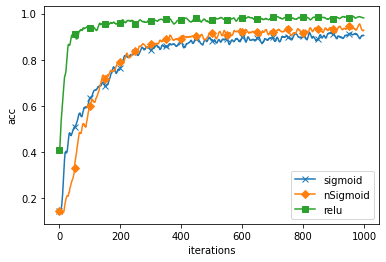

In [34]:
markers = {'sigmoid':"x", 'relu':"s", 'nSigmoid':"D"}
x = np.arange(max_iterations)
for a in act_list:
    plt.plot(x, smooth_curve(train_acc[a]), marker=markers[a], markevery=50, label=a)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.legend()
plt.show()

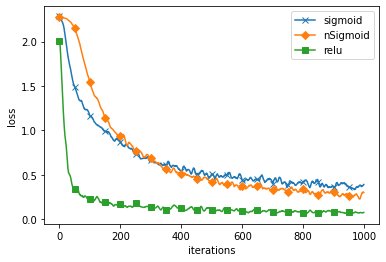

In [35]:
for a in act_list:
    plt.plot(x, smooth_curve(train_loss[a]), marker=markers[a], markevery=50, label=a)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

In [36]:
for key in act:
    print(key + " best acc:" + str(max(train_acc[key])))
    print(key + " best loss:" + str(min(train_loss[key])))

sigmoid best acc:0.96875
sigmoid best loss:0.213559122483796
nSigmoid best acc:0.984375
nSigmoid best loss:0.16495071338692172
relu best acc:1.0
relu best loss:0.02489788071384674


In [37]:
# act = ['nSigmoid']
# for i in range(1):
#     print(i)
#     t_a, t_l = test(0.5, act)
#
#     with open('./result/128_10/test/3.txt', 'a') as f:
#         for key in act:
#             f.write(str(i) + " best acc: " + str(max(t_a[key])) + '\n')
#             f.write(str(i) + " best loss: " + str(min(t_l[key])) + '\n')
